In [1]:
import numpy as np

In [65]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """

    def __init__(self, num_iter, lr, kernel='linear', hit_vector_cnt_threshold = 2, 
                 threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.hit_vector_cnt_threshold = hit_vector_cnt_threshold

    def fit(self, X, y, X_val=None, y_val=None):
        
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """


        y = y.reshape(len(y), 1)

        if X_val is not None:
             y_val = y_val.reshape(len(y_val), 1)

        bias = np.array([1 for _ in range(X.shape[0])]).reshape(X.shape[0], 1)
        X = np.concatenate((X, bias), axis=1)

        if X_val is not None:
            bias = np.array([1 for _ in range(X_val.shape[0])]).reshape(X_val.shape[0], 1)
            X_val = np.concatenate((X_val, bias), axis=1)

        self.num_of_feature = X.shape[1]
        self.num_of_samples = X.shape[0]

        self.label1_val = np.max(y)
        self.label0_val = np.min(y)
        
        train_data = np.concatenate((X, y), axis=1)
        
        LAMBDA_INIT_MIN = 1
        LAMBDA_INIT_MAX = 10
        LAMBDA_INIT_SCALE = 1e-07
        self.lam = np.random.randint(LAMBDA_INIT_MIN, LAMBDA_INIT_MAX, X.shape[0]) * LAMBDA_INIT_SCALE
        self.lam = np.reshape(self.lam, (len(self.lam), 1))
        self.lam_cal_log = np.zeros((len(self.lam), 1))
        #print("Initial lambda:\n{}".format(self.lam))


        for i in range(0, self.iter):
            self.lam = self._gradient_descent(X, y)
            if self.hit_vector_cnt_threshold <= np.sum(self.lam > self.threshold):
                
                selector = self.lam[:, 0] * np.ones(train_data.shape[0])
                sp_vector = train_data[selector > self.threshold, :]
                label_p_cnt = np.sum([sp_vector[:, :-1] == 1])
                label_n_cnt = np.sum([sp_vector[:, :-1] == -1])

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()


    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """

        pred = self._svm_kernel_function(X, X)
        
        return

    def _svm_kernel_function(self, X1, X2):
    
        if self.kernel == 'linear':
            ans = np.dot(X1, X2.T)
        # elif self.kernel == 'rbf':
        #     ans = self.gamma * (np.dot(X1.T, X2) + self.theta0)**self.pow_d
        else:
            ans = 0

        return ans

    def _gradient_descent(self, X, y):

        print(y.shape, self.lam.shape, X.shape)
        tmp1 = y.T * y * self.lam * self._svm_kernel_function(X, X)
        delta = 1 - (np.sum(tmp1, axis=0))
        delta = delta.reshape(len(delta), 1)
        result = self.lam + self.lr * delta.T
        result[result < 0] = 0

        return result

# test

In [60]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm

X, y = datasets.make_blobs( n_samples=50, n_features=2, centers=2, 
                           cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)


In [66]:
clf = ScratchSVMClassifier(num_iter=20, lr=0.05)
clf.fit(X_train, y_train)

(40, 1) (40, 1) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)
(40, 1) (40, 40) (40, 3)


In [68]:
predictions = clf.predict(X_test)

ValueError: operands could not be broadcast together with shapes (40,40) (10,10) 

# Decision Boundry

In [33]:
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

slr = ScratchLogisticRegression(num_iter=1000, lr=0.005, no_bias=True,verbose=False, lam = 0.5)
slr.fit(X_train, y_train, X_test, y_test)

In [25]:
from matplotlib.colors import ListedColormap

def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

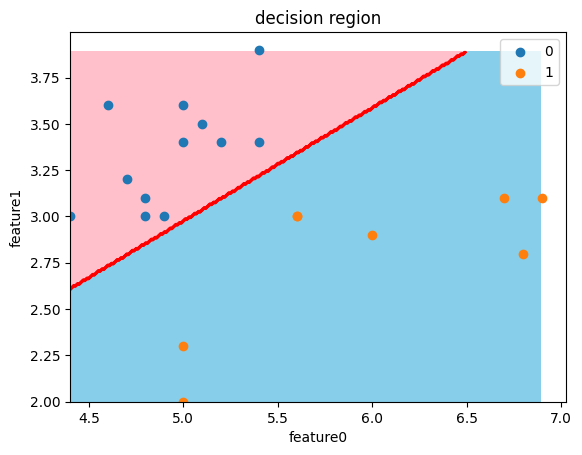

In [34]:
decision_region(X_test,y_test, slr)

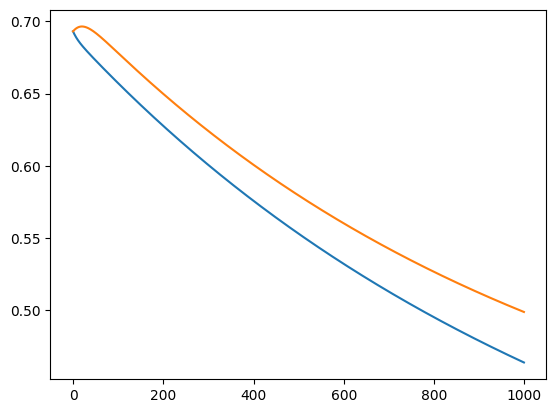

In [35]:
plt.plot(slr.loss)
plt.plot(slr.val_loss)
plt.show()